In [2]:
from __future__ import print_function
import argparse
from math import log10

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from srcnn_data import get_training_set, get_test_set
from srcnn_model import SRCNN


torch.manual_seed(123)
#if use_cuda:
torch.cuda.manual_seed(123)


train_set = get_training_set(2)
test_set = get_test_set(2)
training_data_loader = DataLoader(dataset=train_set, num_workers=4, batch_size=64, shuffle=True)
testing_data_loader = DataLoader(dataset=test_set, num_workers=4, batch_size=64, shuffle=False)


srcnn = SRCNN()
criterion = nn.MSELoss()


#if(use_cuda):
srcnn.cuda()
criterion = criterion.cuda()

optimizer = optim.Adam(srcnn.parameters(),lr=0.01)





def test():
    avg_psnr = 0
    for batch in testing_data_loader:
        input, target = Variable(batch[0]), Variable(batch[1])
        #if use_cuda:
        input = input.cuda()
        target = target.cuda()

        prediction = srcnn(input)
        mse = criterion(prediction, target)
        psnr = 10 * log10(1 / mse.data[0])
        avg_psnr += psnr
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


def checkpoint(epoch):
    model_out_path = "model_epoch_{}.pth".format(epoch)
    torch.save(srcnn, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))

for epoch in range(1, 1500 + 1):
    #train(epoch)
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = Variable(batch[0]), Variable(batch[1])
        #if use_cuda:
        input = input.cuda()
        target = target.cuda()

        optimizer.zero_grad()
        #print ("input shape = " , input.shape)
        #print ("target shape = ", target.shape)
        model_out = srcnn(input)
        #print ("model_out shape =" , model_out.shape)
        loss = criterion(model_out, target)
        epoch_loss += loss.data[0]
        loss.backward()
        optimizer.step()

        print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.data[0]))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))
    test()
    if(epoch%10==0):
        checkpoint(epoch)


E:\Programming\IDE\Anaconda3\envs\pytorch-to-hdw\lib\site-packages\ipykernel_launcher.py:74: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
E:\Programming\IDE\Anaconda3\envs\pytorch-to-hdw\lib\site-packages\ipykernel_launcher.py:78: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


===> Epoch[1](1/4): Loss: 0.2287
===> Epoch[1](2/4): Loss: 0.1849
===> Epoch[1](3/4): Loss: 0.0328
===> Epoch[1](4/4): Loss: 0.0399
===> Epoch 1 Complete: Avg. Loss: 0.1216


E:\Programming\IDE\Anaconda3\envs\pytorch-to-hdw\lib\site-packages\ipykernel_launcher.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


===> Avg. PSNR: 19.5281 dB
===> Epoch[2](1/4): Loss: 0.0103
===> Epoch[2](2/4): Loss: 0.2399
===> Epoch[2](3/4): Loss: 0.0135
===> Epoch[2](4/4): Loss: 0.0920
===> Epoch 2 Complete: Avg. Loss: 0.0889
===> Avg. PSNR: 10.3574 dB
===> Epoch[3](1/4): Loss: 0.0943
===> Epoch[3](2/4): Loss: 0.0425
===> Epoch[3](3/4): Loss: 0.0109
===> Epoch[3](4/4): Loss: 0.0439
===> Epoch 3 Complete: Avg. Loss: 0.0479
===> Avg. PSNR: 13.3090 dB
===> Epoch[4](1/4): Loss: 0.0465
===> Epoch[4](2/4): Loss: 0.0127
===> Epoch[4](3/4): Loss: 0.0150
===> Epoch[4](4/4): Loss: 0.0308
===> Epoch 4 Complete: Avg. Loss: 0.0263
===> Avg. PSNR: 16.3184 dB
===> Epoch[5](1/4): Loss: 0.0230
===> Epoch[5](2/4): Loss: 0.0140
===> Epoch[5](3/4): Loss: 0.0114
===> Epoch[5](4/4): Loss: 0.0129
===> Epoch 5 Complete: Avg. Loss: 0.0154
===> Avg. PSNR: 16.7506 dB
===> Epoch[6](1/4): Loss: 0.0216
===> Epoch[6](2/4): Loss: 0.0133
===> Epoch[6](3/4): Loss: 0.0108
===> Epoch[6](4/4): Loss: 0.0163
===> Epoch 6 Complete: Avg. Loss: 0.0155


In [3]:
print(input.shape)
print(model_out.shape)

torch.Size([8, 1, 128, 128])
torch.Size([8, 1, 128, 128])


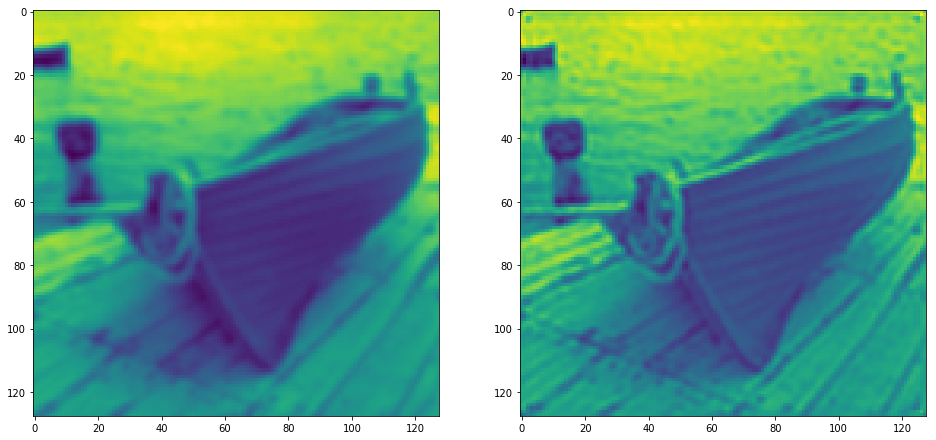

In [4]:
import numpy as np
import matplotlib.pyplot as plot
lrimg=np.zeros([128,128])
srimg=np.zeros([128,128])
for i in range(128):
    for j in range(128):
        lrimg[i,j]=input[0,0,i,j]
        srimg[i,j]=model_out[0,0,i,j]
plot.figure(1,figsize=(16,10))
plot.subplot(121)
plot.imshow(lrimg)
plot.subplot(122)
plot.imshow(srimg)
plot.show()